# Who searched My Blog? Keyword Research Tutorials
---------------
## Objectives
---------------
- I have a blog about life in the US as a Korean (http://selim.tistory.com).
    - The topics of the postings are diverse about life information, traveling US, cooking, grad-life, self-care, and Urbana-Champaign(University of Illinois).  
- I gathered user data for around two months (2021.9.1 - 2021.11.15) through Google analytics. 
- User information and keywords were analyzed to understand and find users' interests.

---------------
## Methods
---------------
- User information (i.e., country, region) and searched keywords (from 2021.9.1 - 2021.11.15) were extracted from Google analytics tools.
- For descriptive analysis, 
    - Using Tableau, I plotted user information by pageviews and retention time. 
- For keyword research, 
    - Using Text Mining methods, general topics were analyzed from the most frequently searched keywords (separately in Korean and English). 



---------------
## Summary of Findings
---------------
- People viewed my blog nearly all over the world. 
    - Top 2 countries were South Korea and U.S.A.
- Because most postings were written in Korean, most keywords were searched in Korean. 
- The keywords searched most were similar between users in South Korea and U.S.A.
- Top 3 topics of User's Interests:
    - 1st topic was local information (such as, 'USA', 'Chicago', 'San Jose', 'LA', or 'Jamsil (a district in Seoul)').
    - 2nd topic was product reviews ('Recommdation', 'Review', 'Instant Pot', 'US grocery market', 'Trader Joe's', 'Shein').
    - 3nd topic was diet/health ('Keto', 'LCHF', 'Review', 'diet', 'stevia').
     

---------------
## Word Clouds 
---------------
- You can find the codes for making them in the following sections of this webpage!

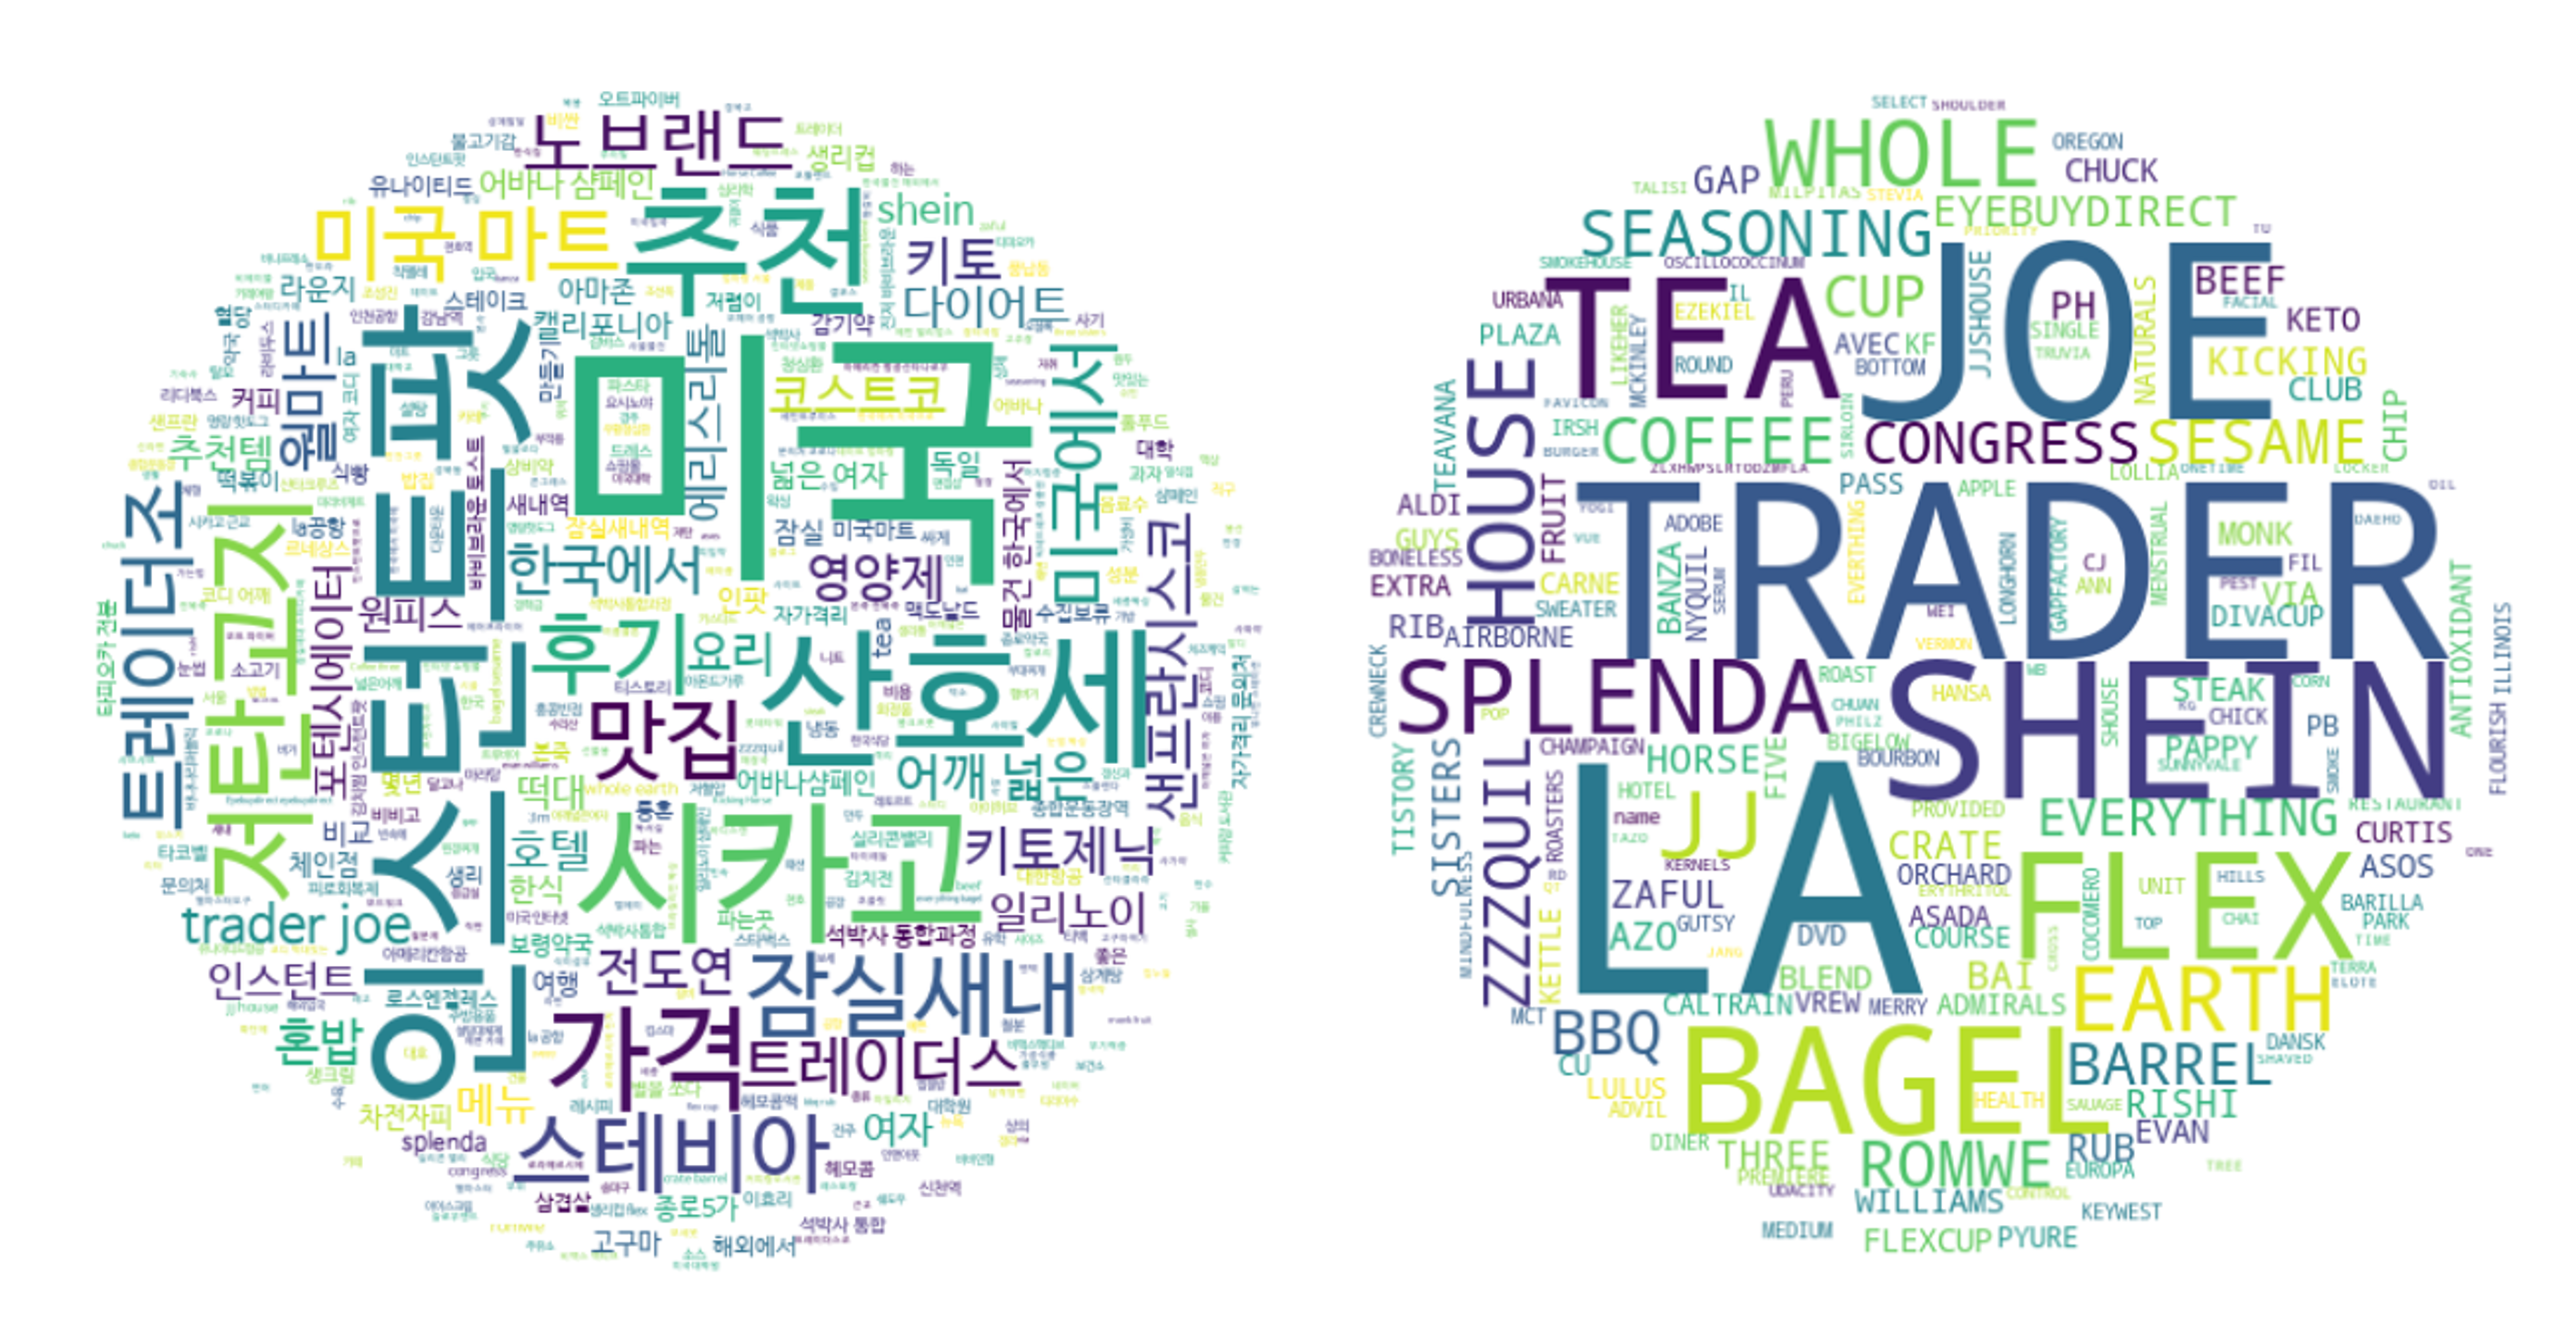

In [2]:
from IPython.display import Image 
Image("clouds.png")

## Descriptive Analysis for Understanding Users (enabled by Tableau)

- Using Tableau, I plotted user's information.

### Geographical Information of Users
- Users viewed my blog all over the world from all continents.
- Top 2 countries were South Korea and U.S.A.

### Time, Country and Page Views
- The time users viewed my blog reflects the time zones they are in. 

### Source, Country, and Page VIews 
- "Google Search" is the most frequent and common method that users were getting into my blog, regardless of country.
- Korean users used "Naver" for the second most, as "Naver" is the most popular search engine in South Korea.
- Daum (another Korean search engine) and Youtube are followed.  


### Searched Keywords 
- The most frequent word is "미국", which means "USA" in Korean.
- However, the list of searched keywords were dispersed as various topics. 
- Therefore, I investigated top topics searched as keywords through the text mining methods from the keywords lists saved as .csv files. 

## Keywords Research (Text Mining)
---------------
- The keywords that were searched most frequently were examined using text mining methods (konlpy for Korean keywords and ntlk/word cloud for English keywords). 

- Using wordcloud, the most frequent keywords were visualized separately in Korean and English.

## 1. Finding topics from Korean keywords

In [17]:
# Import required libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [132]:
df = pd.read_csv('keywords.csv')

In [19]:
df.head()

,Keyword
0,1g 물건
1,1살 유나이티드 비즈니스 클래스
2,1세대 생리컵
3,3m 94
4,3m 94마스크


In [20]:
df.shape

(2478, 1)

In [21]:
import re

def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  
    result = hangul.sub('', text)  
    return result


In [22]:
apply_regular_expression(df['Keyword'][0])

' 물건'

In [24]:
from konlpy.tag import Okt
from collections import Counter

okt = Okt()  
nouns = okt.nouns(apply_regular_expression(df['Keyword'][0]))
nouns

['물건']

In [ ]:
# Create corpus
corpus = "".join(df['Keyword'].tolist())

In [ ]:
# Apply regular expressions
apply_regular_expression(corpus)
# Extract Tokens form Corpus
nouns = okt.nouns(apply_regular_expression(corpus))

In [28]:
counter = Counter(nouns)

In [29]:
counter.most_common(10)

[('미국', 391),
 ('팟', 123),
 ('인스턴트', 113),
 ('시카고', 72),
 ('추천', 72),
 ('한국', 71),
 ('잠실', 61),
 ('산호세', 58),
 ('마트', 57),
 ('여자', 53)]

In [30]:
#Delete Stopwords
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)

[('미국', 391),
 ('인스턴트', 113),
 ('시카고', 72),
 ('추천', 72),
 ('한국', 71),
 ('잠실', 61),
 ('산호세', 58),
 ('마트', 57),
 ('여자', 53),
 ('어깨', 53)]

## Most Common Keywords in Korean (N of Times Searched)

- 'USA' (391) 
- 'Instant' (113) 
- 'Chicago'  (72) 
- 'Recommand' (72) 
- 'Korea' (71) 
- 'Jamsil' (a district of Seoul) (61)
- 'San Jose' (58) 
- Market (57) 
- Women (53) 
- Shoulder (53)

In [31]:
#Delete Stopwords from an external dictionary 
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()

In [42]:
!pip install wordcloud

In [33]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [43]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
import nltk
from PIL import Image

In [34]:
text = open('keywords.csv').read()
circle = np.array(Image.open('circle_1.jpeg'))

stopwords = set(STOPWORDS)
stopwords.add("said")

In [35]:
print('The number of stopwords:',len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:40])


The number of stopwords: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this']


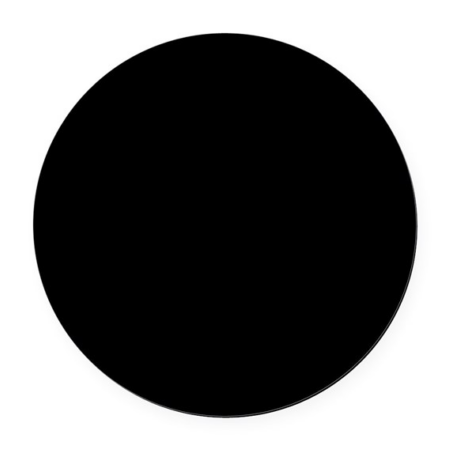

In [36]:
plt.figure(figsize=(8,8))
plt.imshow(circle, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [46]:
# Install Korean fonts
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [47]:
text = open('keywords.csv').read()
circle = np.array(Image.open('circle_1.jpeg'))

stopwords = set(STOPWORDS)
stopwords.add("said")
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
wc = WordCloud(font_path = fontpath, background_color='white', max_words=2000, mask=circle,
              stopwords = stopwords)

wc = wc.generate(text)
wc.words_

{'미국': 1.0,
 '인스턴트팟': 0.3463203463203463,
 '시카고': 0.23809523809523808,
 '산호세': 0.22943722943722944,
 '추천': 0.20346320346320346,
 '가격': 0.12987012987012986,
 '저탄고지': 0.12987012987012986,
 '잠실새내': 0.12554112554112554,
 '후기': 0.12121212121212122,
 '스테비아': 0.12121212121212122,
 '맛집': 0.12121212121212122,
 '미국 마트': 0.11688311688311688,
 '트레이더조': 0.11255411255411256,
 '미국에서': 0.10822510822510822,
 '노브랜드': 0.1038961038961039,
 '트레이더스': 0.1038961038961039,
 '월마트': 0.09956709956709957,
 '샌프란시스코': 0.09523809523809523,
 '한국에서': 0.08658008658008658,
 '키토': 0.08225108225108226,
 '키토제닉': 0.08225108225108226,
 '영양제': 0.07792207792207792,
 '전도연': 0.07792207792207792,
 'trader joe': 0.07792207792207792,
 '어깨 넓은': 0.07792207792207792,
 '요리': 0.0735930735930736,
 '혼밥': 0.0735930735930736,
 '코스트코': 0.0735930735930736,
 '호텔': 0.06926406926406926,
 '다이어트': 0.06926406926406926,
 '메뉴': 0.06493506493506493,
 '에리스리톨': 0.06493506493506493,
 '포텐시에이터': 0.06493506493506493,
 '일리노이': 0.06493506493506493,
 '인스턴트': 0.

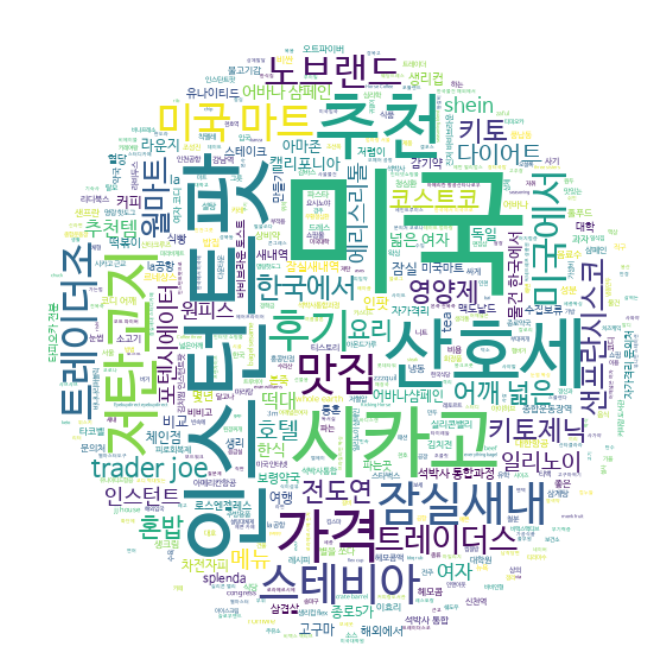

In [48]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## 2. Finding English Keyword Topics

In [133]:
# Finding English Keywords
# Defining Data
list_eng = []

#Delete Special cases
def cleanText(readData):
    text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', ' ', readData)
    return text

for i in df['Keyword']:
    # Deleting Korean words
    text = re.sub('[^a-zA-Z]',' ',i).strip()
    #Delete Special cases
    text = cleanText(text)
    #Capitalize all words 
    text = text.upper()
    # Deleting empty rows
    if(text != ''):
         list_eng.append(text)  
         
print(list_eng)

['G', 'M', 'M', 'M       KF', 'M', 'W OREGON UNIT  URBANA IL', 'NOT PROVIDED', 'ADMIRALS CLUB', 'ADOBE PREMIERE', 'ADVIL', 'AIRBORNE', 'AIRBORNE', 'APPLE', 'ASOS', 'ASOS', 'ASOS', 'AVEC', 'AZO', 'AZO', 'BAGEL SESAME', 'BAGEL SESAME SEASONING BLEND', 'BAI', 'BAI', 'BAI', 'BAI', 'BANZA', 'BANZA', 'BANZA', 'BARILLA', 'BBQ', 'BBQ RUB', 'BEEF BOTTOM ROUND STEAK', 'BEEF CHUCK RIB', 'BEEF CHUCK STEAK', 'BIGELOW', 'CALTRAIN', 'CALTRAIN', 'CHAMPAIGN', 'CHICK FIL A', 'CHUCK STEAK BONELESS CARNE ASADA', 'CJ', 'CONGRESS PLAZA HOTEL', 'CONGRESS', 'CRATE BARREL', 'CRATE BARREL', 'CRATE BARREL', 'CU', 'CU', 'CURTIS ORCHARD', 'CURTIS ORCHARD', 'DANSK', 'DIVACUP', 'DIVACUP MENSTRUAL CUP', 'EUROPA PARK', 'EVAN WILLIAMS', 'EVAN WILLIAMS        BOURBON', 'EVAN WILLIAMS SINGLE BARREL', 'EVERTHING BUT THE BAGEL SESAME', 'EVERYTHING BUT THE BAGEL SEASONING', 'EVERYTHING BUT THE BAGEL SESAME SEASONING BLEND', 'EVERYTHING THE BAGEL', 'EXTRA', 'EXTRA', 'EYEBUYDIRECT', 'EYEBUYDIRECT', 'EYEBUYDIRECT', 'EYEBUYDIRE

In [119]:
 # dictionary of lists  
dict = {'name': list_eng}  
       
df = pd.DataFrame(dict) 
    
# saving the dataframe 
df.to_csv('eng_keywords.csv') 

In [121]:
corpus = pd.DataFrame(list_eng)
text = " ".join(corpus[0].tolist())
text

'G M M M       KF M W OREGON UNIT  URBANA IL NOT PROVIDED ADMIRALS CLUB ADOBE PREMIERE ADVIL AIRBORNE AIRBORNE APPLE ASOS ASOS ASOS AVEC AZO AZO BAGEL SESAME BAGEL SESAME SEASONING BLEND BAI BAI BAI BAI BANZA BANZA BANZA BARILLA BBQ BBQ RUB BEEF BOTTOM ROUND STEAK BEEF CHUCK RIB BEEF CHUCK STEAK BIGELOW CALTRAIN CALTRAIN CHAMPAIGN CHICK FIL A CHUCK STEAK BONELESS CARNE ASADA CJ CONGRESS PLAZA HOTEL CONGRESS CRATE BARREL CRATE BARREL CRATE BARREL CU CU CURTIS ORCHARD CURTIS ORCHARD DANSK DIVACUP DIVACUP MENSTRUAL CUP EUROPA PARK EVAN WILLIAMS EVAN WILLIAMS        BOURBON EVAN WILLIAMS SINGLE BARREL EVERTHING BUT THE BAGEL SESAME EVERYTHING BUT THE BAGEL SEASONING EVERYTHING BUT THE BAGEL SESAME SEASONING BLEND EVERYTHING THE BAGEL EXTRA EXTRA EYEBUYDIRECT EYEBUYDIRECT EYEBUYDIRECT EYEBUYDIRECT EYEBUYDIRECT EZEKIEL FIVE GUYS LA FLEX CUP FLEX CUP FLEX FLEX FLEXCUP FLEXCUP FLEX FLEX FLOURISH G G GAP GAP GAP      S GAPFACTORY CREWNECK SWEATER GAP HANSA COFFEE ROASTERS H I AM GUTSY ILLINOIS 

In [77]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

['G', 'M', 'M', 'M', 'KF', 'M', 'W', 'OREGON', 'UNIT', 'URBANA', 'IL', 'NOT', 'PROVIDED', 'ADMIRALS', 'CLUB', 'ADOBE', 'PREMIERE', 'ADVIL', 'AIRBORNE', 'AIRBORNE', 'APPLE', 'ASOS', 'ASOS', 'ASOS', 'AVEC', 'AZO', 'AZO', 'BAGEL', 'SESAME', 'BAGEL', 'SESAME', 'SEASONING', 'BLEND', 'BAI', 'BAI', 'BAI', 'BAI', 'BANZA', 'BANZA', 'BANZA', 'BARILLA', 'BBQ', 'BBQ', 'RUB', 'BEEF', 'BOTTOM', 'ROUND', 'STEAK', 'BEEF', 'CHUCK', 'RIB', 'BEEF', 'CHUCK', 'STEAK', 'BIGELOW', 'CALTRAIN', 'CALTRAIN', 'CHAMPAIGN', 'CHICK', 'FIL', 'A', 'CHUCK', 'STEAK', 'BONELESS', 'CARNE', 'ASADA', 'CJ', 'CONGRESS', 'PLAZA', 'HOTEL', 'CONGRESS', 'CRATE', 'BARREL', 'CRATE', 'BARREL', 'CRATE', 'BARREL', 'CU', 'CU', 'CURTIS', 'ORCHARD', 'CURTIS', 'ORCHARD', 'DANSK', 'DIVACUP', 'DIVACUP', 'MENSTRUAL', 'CUP', 'EUROPA', 'PARK', 'EVAN', 'WILLIAMS', 'EVAN', 'WILLIAMS', 'BOURBON', 'EVAN', 'WILLIAMS', 'SINGLE', 'BARREL', 'EVERTHING', 'BUT', 'THE', 'BAGEL', 'SESAME', 'EVERYTHING', 'BUT', 'THE', 'BAGEL', 'SEASONING', 'EVERYTHING', 'B

In [78]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 206 samples and 540 outcomes>


In [80]:
fdist.most_common(10)

[('LA', 34),
 ('S', 24),
 ('TRADER', 18),
 ('SHEIN', 16),
 ('JOE', 16),
 ('TEA', 12),
 ('BAGEL', 9),
 ('FLEX', 9),
 ('SPLENDA', 9),
 ('G', 7)]

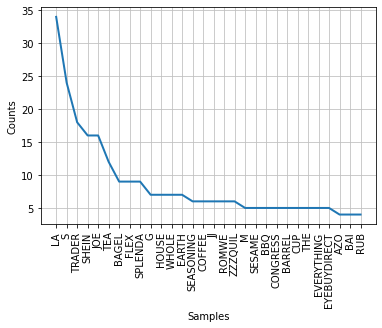

In [81]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [ ]:
#removing stopwords
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

stop_words = set(stopwords.words('english')) 

word_tokens = word_tokenize(text)

result = []
for token in word_tokens: 
    if token not in stop_words: 
        result.append(token) 
text = result

In [83]:
counter = Counter(text)
counter.most_common(10)

[('LA', 34),
 ('S', 24),
 ('TRADER', 18),
 ('SHEIN', 16),
 ('JOE', 16),
 ('TEA', 12),
 ('BAGEL', 9),
 ('FLEX', 9),
 ('SPLENDA', 9),
 ('G', 7)]

In [84]:
#Delete Stopwords
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)

[('LA', 34),
 ('TRADER', 18),
 ('SHEIN', 16),
 ('JOE', 16),
 ('TEA', 12),
 ('BAGEL', 9),
 ('FLEX', 9),
 ('SPLENDA', 9),
 ('HOUSE', 7),
 ('WHOLE', 7)]

In [125]:
text_eng = open('eng_keywords.csv').read()
circle = np.array(Image.open('circle_1.jpeg'))

stopwords = set(STOPWORDS)
wc_e = WordCloud(collocations=False, background_color='white', max_words=2000, mask=circle, stopwords=stopwords)
wc_e = wc_e.generate(text_eng)
wc_e.words_

{'ADMIRALS': 0.058823529411764705,
 'ADOBE': 0.029411764705882353,
 'ADVIL': 0.029411764705882353,
 'AIRBORNE': 0.058823529411764705,
 'ALDI': 0.058823529411764705,
 'ANN': 0.029411764705882353,
 'ANTIOXIDANT': 0.058823529411764705,
 'APPLE': 0.029411764705882353,
 'ASADA': 0.058823529411764705,
 'ASOS': 0.08823529411764706,
 'AVEC': 0.058823529411764705,
 'AZO': 0.11764705882352941,
 'BAGEL': 0.2647058823529412,
 'BAI': 0.11764705882352941,
 'BANZA': 0.08823529411764706,
 'BARILLA': 0.029411764705882353,
 'BARREL': 0.14705882352941177,
 'BBQ': 0.14705882352941177,
 'BEEF': 0.11764705882352941,
 'BIGELOW': 0.029411764705882353,
 'BLEND': 0.08823529411764706,
 'BONELESS': 0.029411764705882353,
 'BOTTOM': 0.029411764705882353,
 'BOURBON': 0.029411764705882353,
 'BURGER': 0.029411764705882353,
 'CALTRAIN': 0.058823529411764705,
 'CARNE': 0.058823529411764705,
 'CHAI': 0.029411764705882353,
 'CHAMPAIGN': 0.029411764705882353,
 'CHICK': 0.029411764705882353,
 'CHIP': 0.08823529411764706,
 '

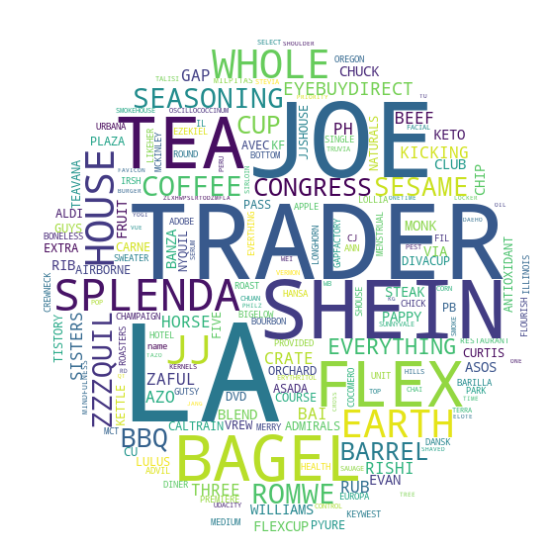

In [126]:
plt.figure(figsize=(10,10))
plt.imshow(wc_e, interpolation='bilinear')
plt.axis('off')
plt.show()

### As you can see in the word clous, I can see the top 3 topics of User's Interests:
- 1st topic was local information (such as, 'USA', 'Chicago', 'San Jose', 'LA', or 'Jamsil').
- 2nd topic was consumer's reviews ('Recommdation', 'Review', 'Instant Pot', 'US grocery market', 'Trader Joe's', 'Shein').
- 3nd topic was diet/health ('Keto', 'LCHF', 'Review', 'diet', 'stevia').